## 读取数据

In [1]:
import pandas as pd

data = pd.read_csv('海康威视_clean_MaxMin.csv')
data = data[-200:]

<AxesSubplot:>

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


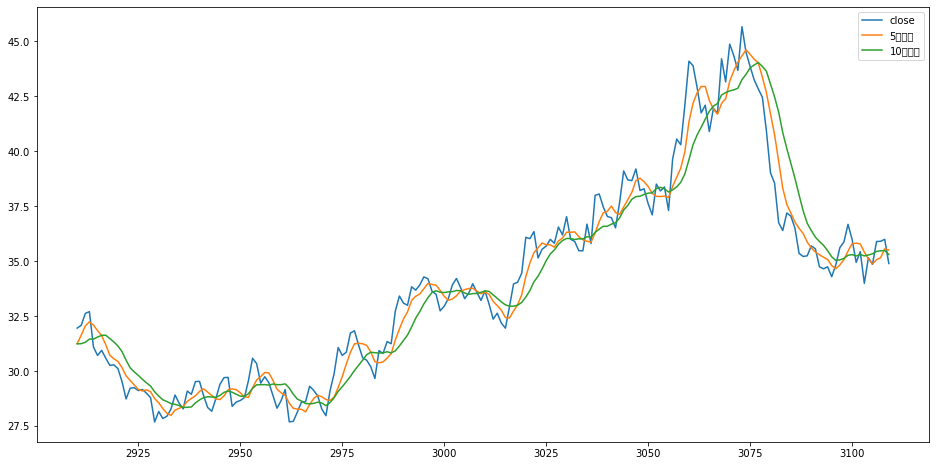

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
data['close'].plot(legend=True)
data['5日均线'].plot(legend=True)
data['10日均线'].plot(legend=True)

<AxesSubplot:>

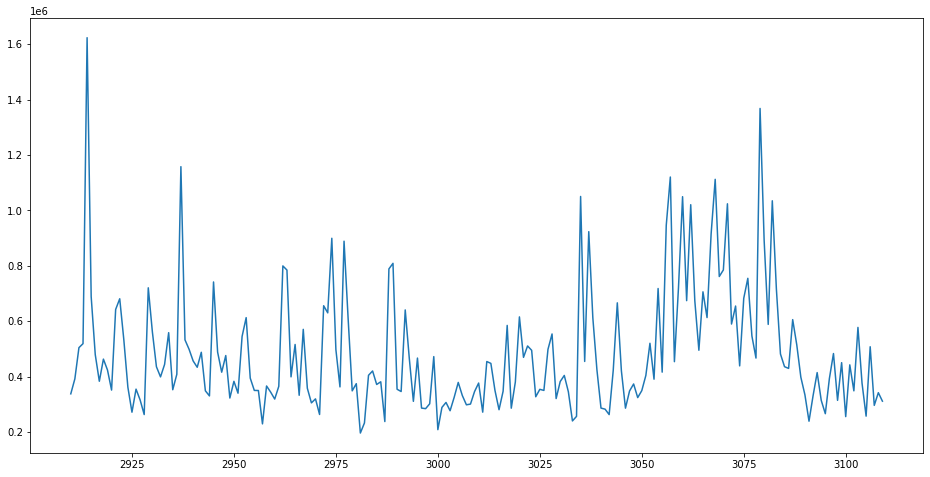

In [3]:
plt.figure(figsize=(16,8))
data['volume'].plot()  # 交易量与股价走势 相关性

<AxesSubplot:>

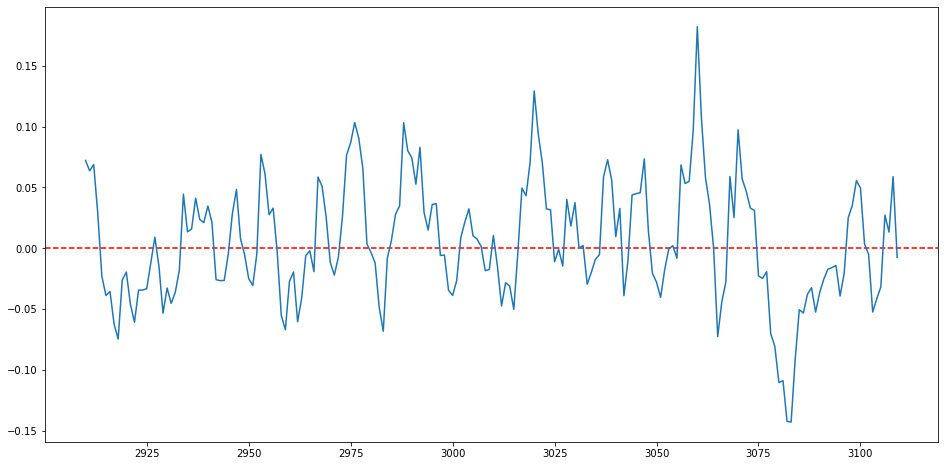

In [4]:
import numpy as np
plt.figure(figsize=(16,8))
# 添加0基准线
plt.axhline(0, color='red', linestyle='--')
data['涨幅'].plot()  # 交易量与股价走势 相关性

<AxesSubplot:>

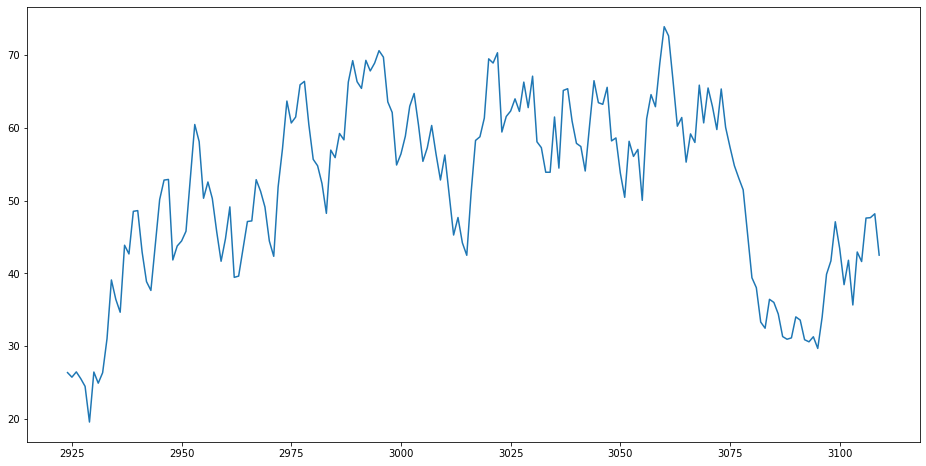

In [5]:
import talib 
# 假设您已经有了一个名为df的DataFrame对象，其中包含日期（在df.index中）和收盘价（在df['close']中）
# 计算RSI指标  相对强弱指标  
# RSI指标基本原理： 
# 通过测量一段时间间内股价上涨总幅度占股价变化总幅度平均值的百分比来评估多空力量的强弱程度， 其能够反映出市场在一定时期内的景气程度
data['RSI'] = talib.RSI(data['close'], timeperiod=14)
plt.figure(figsize=(16,8))
data['RSI'].plot()

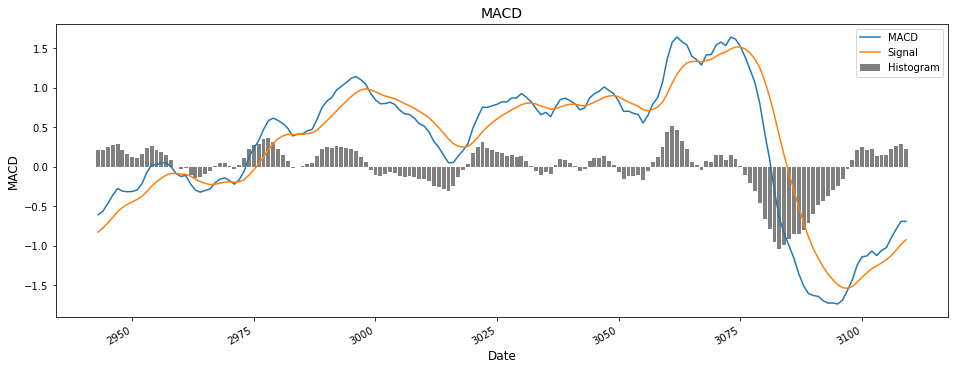

In [6]:
# 计算MACD指标
macd, macdsignal, macdhist = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macdsignal
data['MACD_Histogram'] = macdhist
df = data
# plt.figure(figsize=(16,8))
# data['MACD][-200:].plot()
# data['MACD_Signal][-200:].plot()
# data['MACD_Histogram][-200:].plot()

# 创建图形对象和子图对象
fig, ax = plt.subplots(figsize=(16, 6))

# 绘制MACD线
ax.plot(df.index, macd, label='MACD')
# 绘制信号线
ax.plot(df.index, macdsignal, label='Signal')
# 绘制柱状图
ax.bar(df.index, macdhist, label='Histogram', color='gray')

# 设置图表标题和轴标签
ax.set_title('MACD', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('MACD', fontsize=12)

# 设置图例
ax.legend()

# 自动调整日期显示格式
fig.autofmt_xdate()

# 显示图表
plt.show()